In [1]:
import sqlite3,sys                                     #imported to modules
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_db_connection(dbfile):                     #this function is creating to connection with database 
    connection = None
    try:
        connection = sqlite3.connect(dbfile)
        print("Database Connection Successfully!!")
        return connection
    except Error as err:
        print(f"Error Database connection failed !!!!: '{err}'")

In [3]:
def execute_query(connection,query):                 #this function is execution for queries
    cursor = connection.cursor()
    try:
        quer=cursor.execute(query)
        print("query was succesfully!!")
        connection.commit()
        return quer
    except Error as err:
        print(f"Error query does not work:{err}")

In [4]:
connect=create_db_connection("movielens-small.db")

Database Connection Successfully!!


In [5]:
query = "SELECT name FROM sqlite_master WHERE type = 'table'"  #Table names in database There are 4 table in database 
result=execute_query(connect,query)
table_names=[]
for i in result:
    print("Table Name:",i)
    table_names.append(i[0])

query was succesfully!!
Table Name: ('movies',)
Table Name: ('ratings',)
Table Name: ('links',)
Table Name: ('tags',)


query was succesfully!!
movies Table Row Number --> 8570 
query was succesfully!!
ratings Table Row Number --> 100023 
query was succesfully!!
links Table Row Number --> 8570 
query was succesfully!!
tags Table Row Number --> 2488 


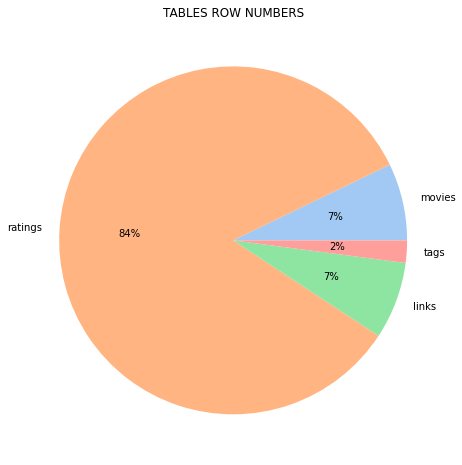

In [10]:
plt.figure(figsize=(8,8))
nums,labels=[],[]
for i in table_names:                                            #Tables row numbers
    query="SELECT * FROM {cha}".format(cha=i)
    result=execute_query(connect,query) 
    rownum=len([j for j in result])
    print("{table} Table Row Number --> {num} ".format(table=i,num=rownum))
    nums.append(rownum)
    labels.append(i)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.title("TABLES ROW NUMBERS")
plt.pie(nums, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [7]:
for i in table_names:                                            #Check to Null values in Tables 
    query="SELECT * FROM {cha}".format(cha=i)
    result=execute_query(connect,query) 
    print(["There are Null" if False in [False if (j=="NULL" or j==None) else True for j in result for k in j] else "There are not NULL value in table"])
    

query was succesfully!!
['There are not NULL value in table']
query was succesfully!!
['There are not NULL value in table']
query was succesfully!!
['There are not NULL value in table']
query was succesfully!!
['There are not NULL value in table']


In [8]:
for i in table_names:                                                                             
    query="SELECT COUNT(DISTINCT movieId) FROM {cha}".format(cha=i)                              
    result=execute_query(connect,query)                                                          #Checking unique movieIDs in
    print("{name} table unique features--> {result}".format(name=i,result=tuple(result)[0][0]))  #tables

query was succesfully!!
movies table unique features--> 8570
query was succesfully!!
ratings table unique features--> 8552
query was succesfully!!
links table unique features--> 8570
query was succesfully!!
tags table unique features--> 672


In [9]:
query = "SELECT COUNT(*) FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId"
result=execute_query(connect,query)                                                    #row number after inner join 
print(tuple(result)[0][0])                                                             #I setup relation to tables on movieId's

query was succesfully!!
100023


In [10]:
query = "SELECT * FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId"    #I made INNER JOIN for arrive to genres colunm
result=execute_query(connect,query)                                               #columns names between two tables  
set([i[0] for i in result.description])

query was succesfully!!


{'genres', 'movieId', 'rating', 'timestamp', 'title', 'userId', 'year'}

In [11]:
query = "SELECT a.userId,a.movieId,a.rating,b.genres FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId LIMIT 5"
result=execute_query(connect,query)                                               # userıd movieıd rating and genres dataframe 
for i in result:print(i)

query was succesfully!!
(7, 1, 5.0, 'Adventure|Animation|Children|Comedy|Fantasy')
(10, 1, 4.0, 'Adventure|Animation|Children|Comedy|Fantasy')
(13, 1, 4.5, 'Adventure|Animation|Children|Comedy|Fantasy')
(16, 1, 5.0, 'Adventure|Animation|Children|Comedy|Fantasy')
(21, 1, 5.0, 'Adventure|Animation|Children|Comedy|Fantasy')


### Missing values between two table movies and ratings

In [12]:
query = "SELECT a.movieId,b.movieId,b.userId,b.rating,b.timestamp FROM movies a LEFT JOIN ratings b ON b.movieId = a.movieId WHERE b.rating IS NULL ; "
result=execute_query(connect,query)                   #There are 18 NULL values between movies and ratings 
for i in result:print(i)                              #This values there are in movies table but there arent in ratings table 

query was succesfully!!
(133, None, None, None, None)
(654, None, None, None, None)
(2499, None, None, None, None)
(6328, None, None, None, None)
(7541, None, None, None, None)
(8574, None, None, None, None)
(8765, None, None, None, None)
(31408, None, None, None, None)
(31687, None, None, None, None)
(33340, None, None, None, None)
(49422, None, None, None, None)
(54248, None, None, None, None)
(59549, None, None, None, None)
(60020, None, None, None, None)
(60382, None, None, None, None)
(68486, None, None, None, None)
(70695, None, None, None, None)
(86487, None, None, None, None)


In [17]:
query = "SELECT movieId,title,year,imdbId,tmdbId,userId,rating,timestamp,SUBSTR(genre,1,INSTR(genre,'|') - 1) as genres FROM (SELECT movieId,title,year,SUBSTR(genres, 1 , 10 ) as genre,imdbId,tmdbId,userId,rating,timestamp FROM (SELECT a.movieId,a.title,a.year,a.genres,b.imdbId,b.tmdbId,c.userId,c.rating,c.timestamp FROM movies a INNER JOIN links b ON a.movieId = b.movieId INNER JOIN ratings c ON b.movieId = c.movieId)) LIMIT 5;"
result=execute_query(connect,query)                                                # I look and prepare values
for i in result:print(i)                                                           

query was succesfully!!
(1, 'Toy Story', 1995, '0114709', '862', 7, 5.0, 835583333, 'Adventure')
(1, 'Toy Story', 1995, '0114709', '862', 10, 4.0, 1113487849, 'Adventure')
(1, 'Toy Story', 1995, '0114709', '862', 13, 4.5, 1275864236, 'Adventure')
(1, 'Toy Story', 1995, '0114709', '862', 16, 5.0, 855198755, 'Adventure')
(1, 'Toy Story', 1995, '0114709', '862', 21, 5.0, 865106839, 'Adventure')


### 1.Question : Write a SQL query to create a dataframe with including userid, movieid, genre and rating

In [13]:
query = "SELECT a.userId,a.movieId,a.rating,b.genres FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId INNER JOIN links c ON a.movieId = c.movieId LIMIT 5"
result=execute_query(connect,query)   # userıd movieıd rating and genres dataframe 
for i in result:print(i)

query was succesfully!!
(7, 1, 5.0, 'Adventure|Animation|Children|Comedy|Fantasy')
(10, 1, 4.0, 'Adventure|Animation|Children|Comedy|Fantasy')
(13, 1, 4.5, 'Adventure|Animation|Children|Comedy|Fantasy')
(16, 1, 5.0, 'Adventure|Animation|Children|Comedy|Fantasy')
(21, 1, 5.0, 'Adventure|Animation|Children|Comedy|Fantasy')


### 2.Question : Count ratings for each movie, and list top 5 movies with the highest value

In [26]:
query = "SELECT COUNT(rating) as terra,title FROM (SELECT * FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId) GROUP BY title ORDER BY terra DESC LIMIT 5;"
result=execute_query(connect,query)
for i in result:print(i)

query was succesfully!!
(337, 'Silence of the Lambs, The')
(328, 'Shawshank Redemption, The')
(327, 'Pulp Fiction')
(324, 'Jurassic Park')
(318, 'Forrest Gump')


## 3.Question: Find and list top 5 most rated genres

In [16]:
query = "SELECT COUNT(rating) as terra,genres FROM (SELECT * FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId INNER JOIN links c ON a.movieId = c.movieId) GROUP BY genres ORDER BY terra DESC LIMIT 5"
result=execute_query(connect,query)
for i in result:print(i)


query was succesfully!!
(7008, 'Drama')
(6396, 'Comedy')
(3877, 'Comedy|Romance')
(3121, 'Drama|Romance')
(3000, 'Comedy|Drama')


query was succesfully!!
query was succesfully!!


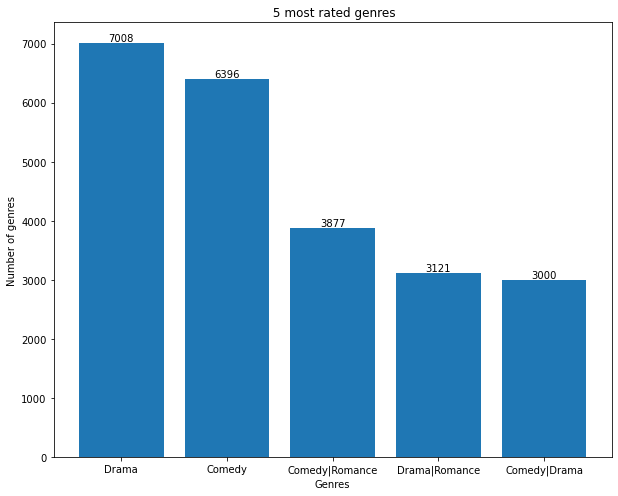

In [43]:
query = "SELECT COUNT(rating) as terra,genres FROM (SELECT * FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId INNER JOIN links c ON a.movieId = c.movieId) GROUP BY genres ORDER BY terra DESC LIMIT 5"
result = execute_query(connect,query)
genres = [i[1] for i in result]
query = "SELECT COUNT(rating) as terra,genres FROM (SELECT * FROM movies b INNER JOIN ratings a ON a.movieId = b.movieId INNER JOIN links c ON a.movieId = c.movieId) GROUP BY genres ORDER BY terra DESC LIMIT 5"
result = execute_query(connect,query)
counts = [i[0] for i in result]

fig, ax = plt.subplots(figsize=(10,8))

bars = ax.bar(genres, counts)
ax.bar_label(bars)

plt.xlabel("Genres")
plt.ylabel("Number of genres")
plt.title(" 5 most rated genres")
plt.show()
